In [1]:
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pokemon_swsh = pd.read_csv("pokemon_swsh.csv")
pokemon_swsh.head()

,galar_no,name,H,A,B,C,D,S,total
0,1,サルノリ,50,65,50,40,40,65,310
1,2,バチンキー,70,85,70,55,60,80,420
2,3,ゴリランダー,100,125,90,60,70,85,530
3,4,ヒバニー,50,71,40,40,40,69,310
4,5,ラビフット,65,86,60,55,60,94,420


## EDA

In [3]:
# レートで使えるポケモンに絞る
rate_swsh = pokemon_swsh[:419]
rate_swsh.tail()

,galar_no,name,H,A,B,C,D,S,total
414,393,ジャランゴ,55,75,90,65,70,65,420
415,394,ジャラランガ,75,110,125,100,105,85,600
416,395,ドラメシヤ,28,60,30,40,30,82,270
417,396,ドロンチ,68,80,50,60,50,102,410
418,397,ドラパルト,88,120,75,100,75,142,600


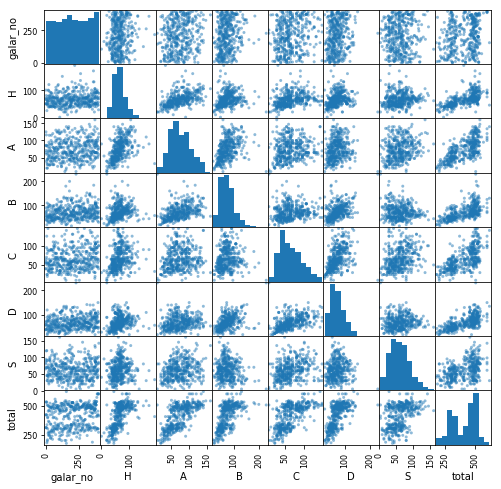

In [4]:
# 散布図行列
plotting.scatter_matrix(rate_swsh, figsize=(8, 8)) 
plt.show()

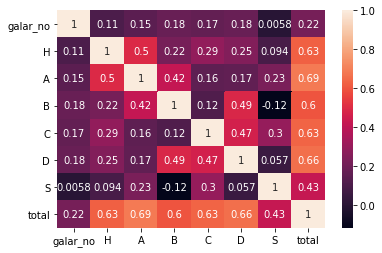

In [5]:
# 相関係数行列
sns.heatmap(rate_swsh.corr(),
            annot=True,
            xticklabels=rate_swsh.corr().columns.values,
            yticklabels=rate_swsh.corr().columns.values
           )
plt.show()

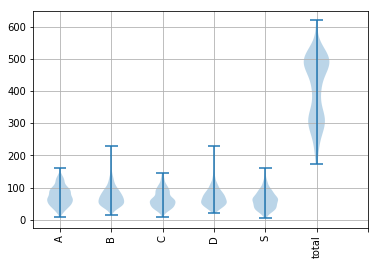

In [6]:
# バイオリンプロット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.violinplot(rate_swsh.iloc[:, 3:].values.T.tolist())
ax.set_xticks([1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(rate_swsh.columns[3:], rotation=90)
plt.grid()
plt.show()

count    419.000000
mean     408.436754
std      100.948576
min      175.000000
25%      310.000000
50%      440.000000
75%      494.000000
max      620.000000
Name: total, dtype: float64


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


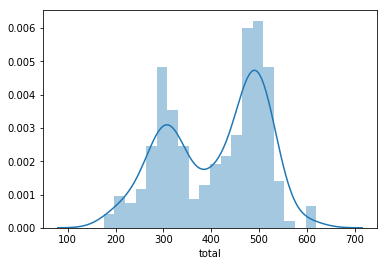

In [7]:
# 合計種族値
print(rate_swsh["total"].describe())
sns.distplot(rate_swsh["total"], bins=20)
plt.show()

In [8]:
rate_swsh.sort_values("total", ascending=False)[:10]

,galar_no,name,H,A,B,C,D,S,total
156,155,ヨワシ,45,140,130,140,135,30,620
418,397,ドラパルト,88,120,75,100,75,142,600
415,394,ジャラランガ,75,110,125,100,105,85,600
412,391,ヌメルゴン,90,100,70,110,150,80,600
409,388,サザンドラ,92,105,90,125,90,98,600
406,385,バンギラス,100,134,110,95,100,61,600
403,382,シルヴァディ,95,95,95,95,95,95,570
70,71,ウインディ,90,110,80,100,80,95,555
268,259,トゲキッス,85,50,95,120,115,80,545
383,368,ヒヒダルマ,105,160,55,30,55,135,540


count    419.000000
mean      61.801909
std       27.686495
min        5.000000
25%       40.000000
50%       60.000000
75%       80.000000
max      160.000000
Name: S, dtype: float64


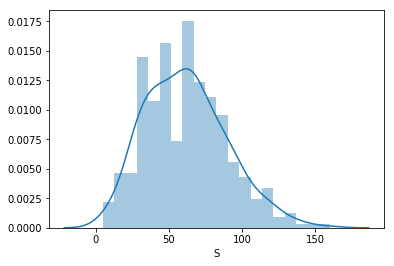

In [9]:
# 素早さ
print(rate_swsh["S"].describe())
sns.distplot(rate_swsh["S"], bins=20)
plt.show()

In [10]:
rate_swsh.sort_values("S", ascending=False)[:10]

,galar_no,name,H,A,B,C,D,S,total
104,105,テッカニン,61,90,45,50,50,160,456
285,276,アギルダー,80,70,40,100,60,145,495
418,397,ドラパルト,88,120,75,100,75,142,600
182,181,カマスジョー,61,123,60,60,50,136,490
383,368,ヒヒダルマ,105,160,55,30,55,135,540
206,198,サンダース,65,65,60,110,95,130,525
386,370,コオリッポ,75,80,70,65,50,130,470
302,293,マニューラ,70,120,65,45,85,125,510
190,188,アブリボン,60,55,60,95,70,124,464
178,177,オンバーン,85,70,80,97,80,123,535


In [11]:
# 防御
rate_swsh.sort_values("B", ascending=False)[:15]

,galar_no,name,H,A,B,C,D,S,total
236,227,ツボツボ,20,10,230,10,230,5,505
180,179,ハガネール,75,85,200,55,65,30,510
372,359,クレベース,95,117,184,44,46,28,514
150,151,パルシェン,50,95,180,85,45,70,525
179,178,イワーク,35,45,160,30,45,70,385
317,308,ドヒドイデ,50,63,152,53,142,35,495
342,331,ニダンギル,59,110,150,45,49,35,448
339,328,デスバーン,58,95,145,50,105,30,483
340,329,デスカーン,58,50,145,95,105,30,483
343,332,ギルガルド,60,50,140,50,140,60,500


In [12]:
# 特攻
rate_swsh.sort_values("C", ascending=False)[:10]

,galar_no,name,H,A,B,C,D,S,total
246,237,サニゴーン,60,95,50,145,130,30,510
17,18,クワガノン,77,70,90,145,75,43,500
298,289,シャンデラ,60,55,90,145,90,80,520
344,332,ギルガルド,60,140,50,140,50,60,500
156,155,ヨワシ,45,140,130,140,135,30,620
252,243,ブリムオン,57,90,95,136,103,29,510
359,346,ジジーロン,78,60,85,135,91,36,485
348,336,ポットデス,60,65,65,134,114,70,508
211,203,グレイシア,65,60,110,130,95,65,525
208,200,エーフィ,65,65,60,130,95,110,525


### 主成分分析

In [13]:
# 厨ポケのフラグを追加
isChupoke = [0] * len(rate_swsh)

chupoke = ["ミミッキュ", "ドラパルト", "サザンドラ", "ロトム", "バンギラス", "リザードン", "ギルガルド", "トゲキッス", "アイアント", "ドヒドイデ", "ナットレイ", "アーマーガア", "ウィンディ", "ギャラドス", "パルシェン", "ドリュウズ", "カバルドン", "オーロンゲ", "オノノクス", "ヒヒダルマ"]
for i in range(len(rate_swsh)):
    if rate_swsh["name"][i] in chupoke:
        isChupoke[i] = 1
rate_swsh["isChupoke"] = isChupoke
rate_swsh.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,galar_no,name,H,A,B,C,D,S,total,isChupoke
0,1,サルノリ,50,65,50,40,40,65,310,0
1,2,バチンキー,70,85,70,55,60,80,420,0
2,3,ゴリランダー,100,125,90,60,70,85,530,0
3,4,ヒバニー,50,71,40,40,40,69,310,0
4,5,ラビフット,65,86,60,55,60,94,420,0


各次元の寄与率: [0.80571412 0.06787654]
累積寄与率: 0.8735906656592968


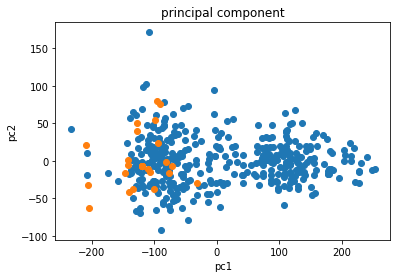

In [14]:
from sklearn.decomposition import PCA
features = rate_swsh.drop(["galar_no", "name", "isChupoke"], axis=1)
targets = rate_swsh["isChupoke"]

# 主成分分析する
pca = PCA(n_components=2)
pca.fit(features)

# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(features)

# 主成分をプロットする
for label in np.unique(targets):
    plt.scatter(transformed[targets == label, 0],
                transformed[targets == label, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の寄与率を出力する
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

# グラフを表示する
plt.show()